In [7]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

raw_df = pd.read_csv('./20220305_20220415_301.csv')


def min_max_scaling(x):
    x_np = np.asarray(x)
    return (x_np - x_np.min()) / (x_np.max() - x_np.min() + 1e-7 )

#역정규화 : 정규화된 값을 원래의 값으로 되돌림
def reverse_min_max_scaling(org_x, x): #종가 예측값
    org_x_np = np.asarray(org_x) 
    x_np = np.asarray(x)
    return (x_np * (org_x_np.max() - org_x_np.min() + 1e-7)) + org_x_np.min()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns = list(raw_df.columns)
del columns[0]
scale_cols = list(columns)

# scaled_df = scaler.fit_transform(raw_df[scale_cols])
scaled_df = min_max_scaling(raw_df[scale_cols])
scaled_df = pd.DataFrame(scaled_df, columns=scale_cols)



# 입력 파라미터 feature, label => numpy type

def make_sequene_dataset(feature, label, window_size):

    feature_list = []      # 생성될 feature list
    label_list = []        # 생성될 label list

    for i in range(len(feature)-window_size):

        feature_list.append(feature[i:i+window_size])
        label_list.append(label[i+window_size])

    return np.array(feature_list), np.array(label_list)

# feature_cols = ['1_성북생태체험관' ,'2_정릉초교','3_정릉동풍림상가앞','4_정릉동풍림아파트.청소년문화의집','5_북한산보국문역2번출구']
# label_cols = [ '3_정릉동풍림상가앞' ]

# feature_cols=columns[50:55]
# label_cols=columns[0:1]

feature_cols=columns[0:len(columns)]
label_cols=columns[0:len(columns)]

print(feature_cols)
print(label_cols)

feature_df = pd.DataFrame(scaled_df, columns=feature_cols)
label_df = pd.DataFrame(scaled_df, columns=label_cols)

feature_np = feature_df.to_numpy()
label_np = label_df.to_numpy()

print(feature_np.shape, label_np.shape)

window_size = 168

X, Y = make_sequene_dataset(feature_np, label_np, window_size)

print(X.shape, Y.shape)

split = -168

x_train = X[0:split]
y_train = Y[0:split]

x_test = X[split:]
y_test = Y[split:]

# model = Sequential()

# model.add(LSTM(128, activation='ReLU', input_shape=x_train[0].shape))

# model.add(Dense(len(columns), activation='linear'))
# # model.add(Dense(1, activation='linear'))


# model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# from tensorflow.keras.callbacks import EarlyStopping

# early_stop = EarlyStopping(monitor='val_loss', patience=5)

# model.fit(x_train, y_train, 
#           validation_data=(x_test, y_test),
#           epochs=100, batch_size=16,
#           callbacks=[early_stop])

['1_서울버스종점', '2_장지공영차고지', '3_아이코리아', '4_송파글마루도서관.버들어린이집', '5_송파파인타운3단지.한림예고', '6_장지동주민센터앞', '7_한림연예예술고교', '8_구송파세무서', '9_문덕초등학교.문정고등학교', '10_문정동푸르지오아파트', '11_문정동래미안아파트', '12_가락동미륭아파트', '13_가윤예식장', '14_경찰병원.서울동부고용노동지청', '15_제일오피스텔', '16_가락시장.가락시장역', '17_송파역', '18_석촌역', '19_석촌호수.한솔병원', '20_잠실역.롯데월드', '21_잠실5단지', '22_잠실새내역.잠실2동주민센터', '23_잠실엘스아파트앞', '24_종합운동장사거리', '25_잠실종합운동장', '26_강남경찰서면허시험장', '27_삼성역7번출구', '28_봉은사역3번출구.삼성1파출소', '29_청담역.경기고교', '30_진흥아파트', '31_강남구청.강남세무서', '32_청담동래미안아파트', '33_강남구청역', '34_영동고교앞', '35_일지아트홀.압구정동노인복지센터', '36_한양아파트.압구정로데오역', '37_압구정파출소', '38_현대아파트', '39_금호역', '40_약수역4번출구.금호터널입구', '41_약수역1번출구', '42_장충체육관앞', '43_장충동.동국대입구', '44_광희동', '45_동대문역사문화공원', '46_충신동', '47_이화동(이화장)', '48_방송통신대.이화장', '49_혜화역.마로니에공원', '50_혜화동로터리', '51_명륜3가.성대입구', '52_창경궁.서울대학교병원', '53_현대그룹빌딩', '54_이화동(이화장)', '55_충신동', '56_동대문', '57_동대문역사문화공원', '58_광희동', '59_장충동.동국대입구', '60_장충체육관앞', '61_약수역10번출구', '62_약수역5번출구.금호터널입구', '63_금호역', '64_현대아파트', '65_압구정파출소', '66_한양아파트.압구정로데오역', '67_일지아트홀', '68_영동고

In [2]:
# 모델 저장
model.save('20220305_20220415_1020.h5')

In [15]:
results = model.evaluate(x_test, y_test, batch_size=16)
print("test loss, test acc:", results)

2/2 [==============================] - 0s 80ms/step - loss: 0.0070 - mae: 0.0522
test loss, test acc: [0.00695062056183815, 0.052162736654281616]


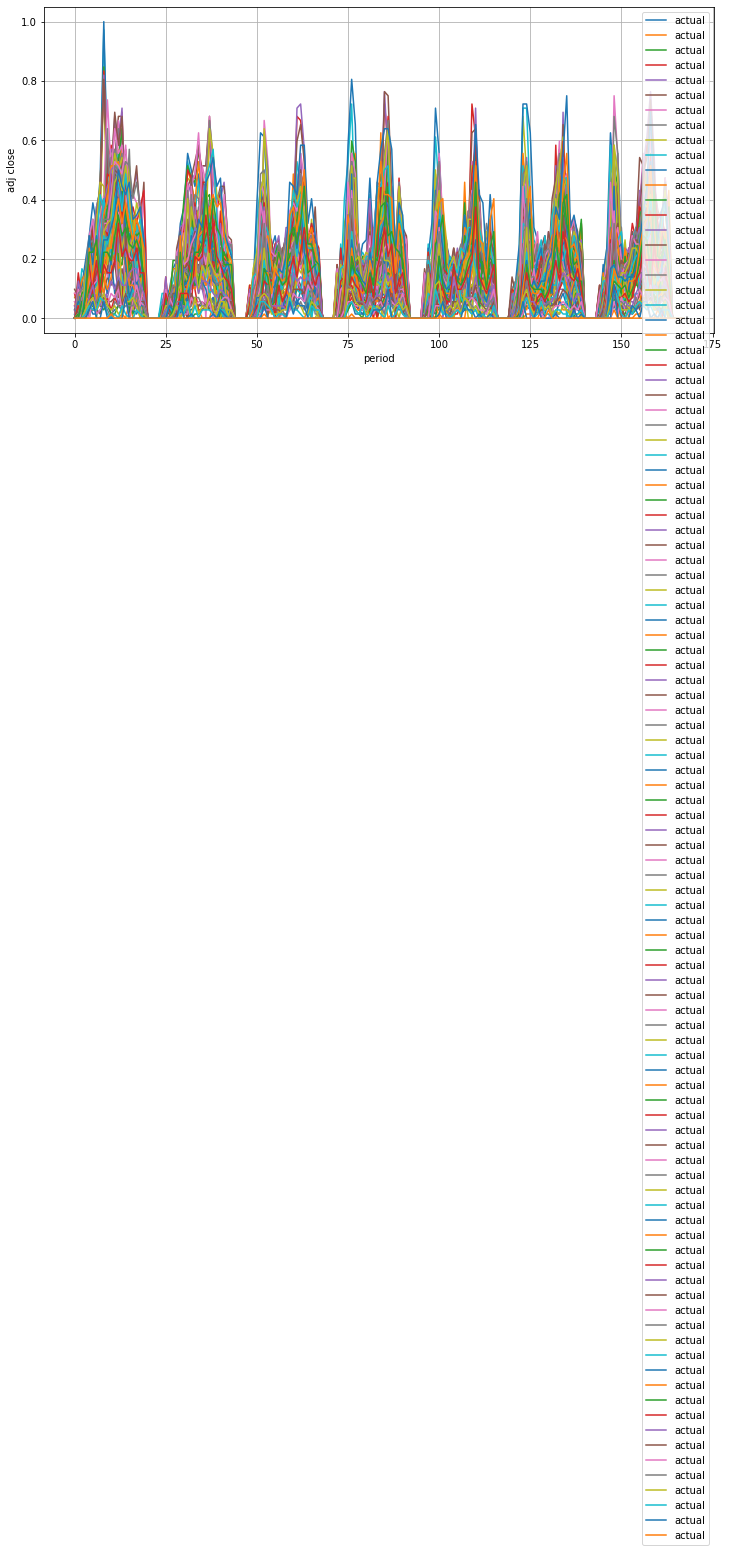

In [5]:
# pred = model.predict(x_test)

plt.figure(figsize=(12, 6))
plt.ylabel('adj close')
plt.xlabel('period')
plt.plot(y_test, label='actual')
# plt.plot(pred, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()

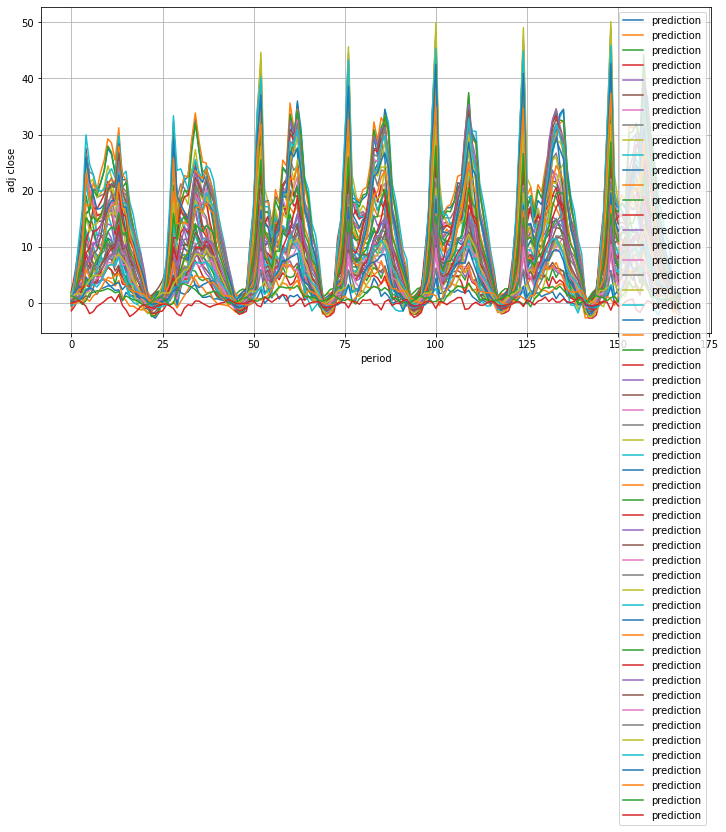

In [17]:
#역정규화 : 정규화된 값을 원래의 값으로 되돌림
def reverse_min_max_scaling(org_x, x): #종가 예측값
    org_x_np = np.asarray(org_x) 
    x_np = np.asarray(x)
    return (x_np * (org_x_np.max() - org_x_np.min() + 1e-7)) + org_x_np.min()

result = reverse_min_max_scaling(raw_df[scale_cols], pred)

plt.figure(figsize=(12, 6))
plt.ylabel('adj close')
plt.xlabel('period')
plt.plot(result, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()

[[1. 4. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


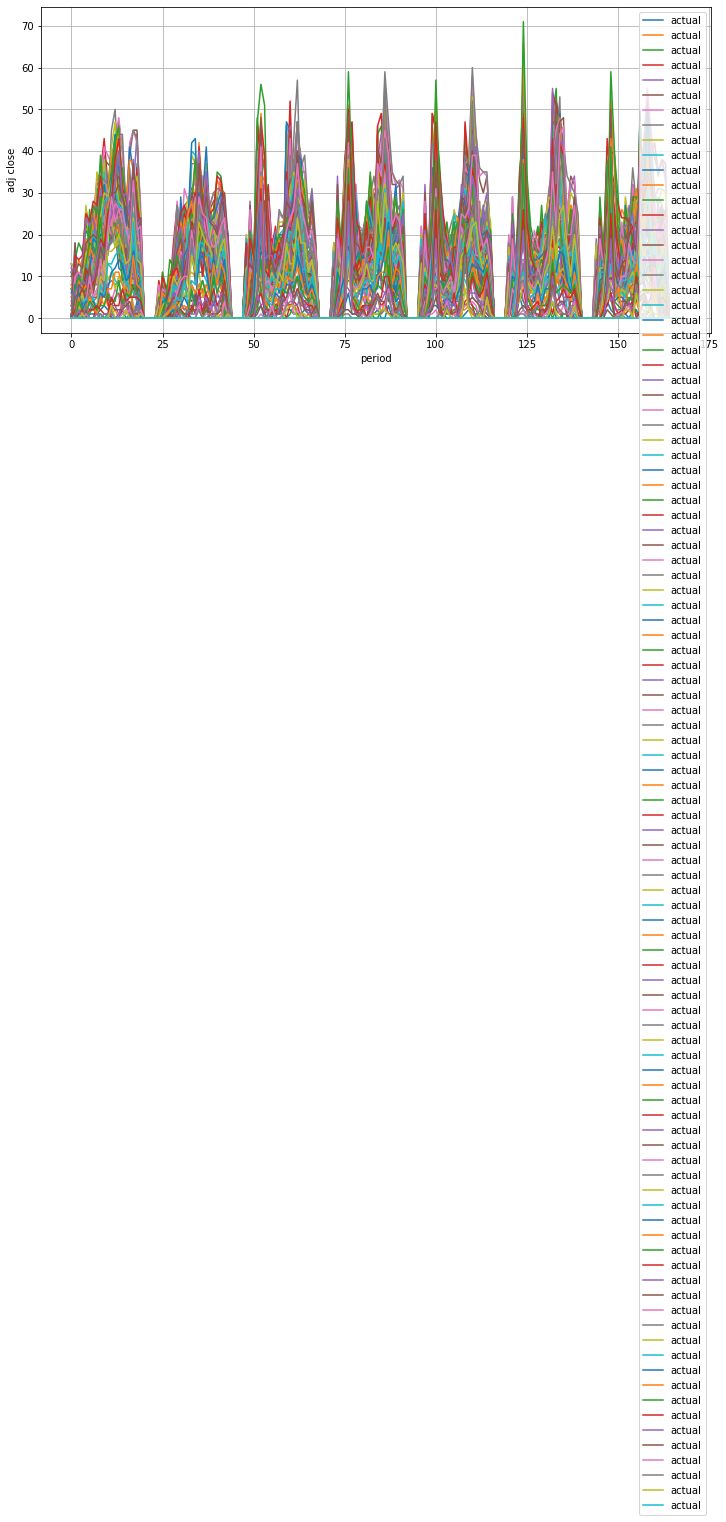

In [8]:
#역정규화 : 정규화된 값을 원래의 값으로 되돌림
def reverse_min_max_scaling(org_x, x): #종가 예측값
    org_x_np = np.asarray(org_x) 
    x_np = np.asarray(x)
    return (x_np * (org_x_np.max() - org_x_np.min() + 1e-7)) + org_x_np.min()

result = reverse_min_max_scaling(raw_df[scale_cols], y_test)
print(result)
plt.figure(figsize=(12, 6))
plt.ylabel('adj close')
plt.xlabel('period')
plt.plot(result, label='actual')
plt.grid()
plt.legend(loc='best')

plt.show()